In [4]:
import pandas as pd
import numpy as np

In [5]:
protests = pd.read_csv('1900-01-01-2022-11-18protests.csv')

# Convert event_time from string to datetime object

In [6]:
from datetime import datetime
def convert_to_datetime(date_string):
    return datetime.strptime(date_string, "%d %B %Y").date()

In [7]:
protests["event_date"] = protests["event_date"].apply(convert_to_datetime)

In [8]:
protests.to_csv("protests_clean.csv", index = False)

In [9]:
# for debugging 
# head = protests.head()
# interested = protests[['data_id', 'event_id_no_cnty', 'event_date', 'year', 'event_type', 'sub_event_type']]
# notes = protests[['notes']]
# note = notes.iat[6841,0]
# note

# Extract Protest Size from Notes Col

In [10]:
def extract_size(s):
    if type(s) == str:
        pos = s.rfind("[size")
        pos2 = s.rfind("[Size")
        pos3 = s.rfind("(size")
        pos4 = s.rfind("[Szie")
        pos5 = s.rfind("Size")
        if pos == -1 and pos2 == -1 and pos3 == -1 and pos4 == -1 and pos5 == -1:
            s = None
        else:
            s = s[pos+1:]
            pos2 = s.find("]")
            s = s[:pos2]
            if s[-1] == ".":
                s = s[:-1]
                s = s[s.find("=")+1:]
            else:
                s = s[s.find("=")+1:]
        if type(s) == str and len(s) > 1:
            if s[0] == " ":
                s = s[1:]
            if s[0] == "'":
                s = s[1:-1]
    else:
        s = None
    return s

In [11]:
# first, take out None values in the notes column
protests = protests[~protests['notes'].isnull()]

# added a column of size with information extracted from notes column
protests['size'] = protests['notes'].apply(extract_size)

In [14]:
size_not_reported = protests[protests['size'].isnull()].reset_index(drop=True)
# text = size_reported.at[0, 'notes']
# for i in range(3110,3120):
#     print(size_not_reported.at[i, 'notes'], "\n")

In [15]:
size_reported = protests[~protests['size'].isnull()] 

# There may be other values I'm missing
size_reported = size_reported[size_reported['size'] != "no report"]
size_reported = size_reported[size_reported['size'] != "No Report"]
size_reported = size_reported[size_reported['size'] != "no eport"]
size_reported = size_reported[size_reported['size'] != "no reports"]
size_reported = size_reported[size_reported['size'] != "no reply"]
size_reported = size_reported[size_reported['size'] != "no review"]

count_size = len(size_reported)
count_unique = len(size_reported['event_id_cnty'].unique())
print(count_size/len(protests), 'of the dataset have actual information on size')
print(count_unique/len(protests), 'of the dataset are unique events with actual information on size')

0.25218409864071023 of the dataset have actual information on size
0.25218409864071023 of the dataset are unique events with actual information on size


In [16]:
print("There are", len(size_reported['event_id_no_cnty'].unique()), "unique events with some information of protest size")

There are 55069 unique events with some information of protest size


In [17]:
print("There are", len(size_reported['size'].unique()), "unique values in size")

There are 8091 unique values in size


In [18]:
def convert_to_numerical(size_string):
    try:
        size_string = int(size_string)
    except:
        size_string = None
    return size_string

In [19]:
size_reported['numerical_size'] = size_reported['size'].apply(convert_to_numerical)

In [20]:
print(len(size_reported[~size_reported['numerical_size'].isnull()])/len(size_reported)*100, "% of the size values are numerical.")

8.088613815050543 % of the size values are numerical.


In [21]:
print(len(size_reported[~size_reported['numerical_size'].isnull()])/len(protests)*100, "% of the size values are numerical.")

2.0398197842013177 % of the size values are numerical.


In [22]:
def has_numbers(size_string):
    return any(char.isdigit() for char in size_string)

In [23]:
size_reported['has_numbers'] = size_reported['size'].apply(has_numbers)

In [24]:
print(len(size_reported[size_reported['has_numbers'] == True])/len(size_reported)*100, "% of the size values are numerical.")

64.03032572070386 % of the size values are numerical.


In [25]:
print(len(size_reported[size_reported['has_numbers'] == True])/len(protests)*100, "% of the size values are numerical.")

16.147429977546786 % of the size values are numerical.


# Export a csv

In [27]:
size_reported.to_csv("size_reported.csv", index = False)

In [29]:
numerical_size_reported = size_reported[~size_reported['numerical_size'].isnull()].reset_index(drop=True)
numerical_size_reported

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,size,numerical_size,has_numbers
0,9634744,484,MEX67204,67204,2022-11-11,2022,1,Protests,Peaceful protest,Protesters (Mexico),...,1,La Silla Rota,National,"On 11 November 2022, in Ciudad de Mexico - Tla...",0,1668453946,MEX,40,40.0,True
1,9634783,484,MEX67177,67177,2022-11-11,2022,1,Protests,Peaceful protest,Protesters (Mexico),...,1,Milenio,National,"On 11 November 2022, in Ciudad de Mexico - Ben...",0,1668453946,MEX,20,20.0,True
2,9638563,578,NOR1055,1055,2022-11-11,2022,1,Protests,Protest with intervention,Protesters (Denmark),...,1,Oslo Politiet; VG,New media-National,"On 11 November 2022, three environmental activ...",0,1668530072,NOR,3,3.0,True
3,9640439,380,ITA17704,17704,2022-11-11,2022,1,Protests,Protest with intervention,Protesters (Italy),...,1,Secolo D'Italia,National,"On 11 November 2022, five Last Generation acti...",0,1668531724,ITA,5,5.0,True
4,9640478,380,ITA17705,17705,2022-11-11,2022,1,Protests,Protest with intervention,Protesters (Italy),...,1,Torino Today,Subnational,"On 11 November 2022, for the second consecutiv...",0,1668531724,ITA,46,46.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13822,8789485,104,MMR7256,7256,2010-05-01,2010,1,Protests,Peaceful protest,Protesters (Myanmar),...,2,Radio Free Asia,Regional,"On 1 May 2010, in Sanchaung Township, in Yango...",0,1642517539,MMR,30,30.0,True
13823,8789487,104,MMR7248,7248,2010-03-08,2010,1,Protests,Peaceful protest,Protesters (Myanmar),...,2,Radio Free Asia,Regional,"On 8 March 2010, in Hlaingthayar Township, in ...",0,1642517539,MMR,500,500.0,True
13824,5955375,104,MMR7240,7240,2010-02-19,2010,1,Protests,Peaceful protest,Protesters (Myanmar),...,1,Radio Free Asia,Regional,"On 19 February 2010, in Shwepyithar Township, ...",0,1618564884,MMR,400,400.0,True
13825,8789282,104,MMR7238,7238,2010-02-17,2010,1,Protests,Peaceful protest,Protesters (Myanmar),...,2,Radio Free Asia,Regional,"On 17 February 2010, in Insein Township, in Ya...",0,1642517538,MMR,80,80.0,True


In [30]:
numerical_size_reported.to_csv("numerical_size_reported.csv", index = False)

# Now, we explore some protests with size variables

In [31]:
BRA = numerical_size_reported[numerical_size_reported['iso3']=='BRA']
BRA

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,size,numerical_size,has_numbers
84,9632479,76,BRA60677,60677,2022-11-04,2022,1,Protests,Peaceful protest,Protesters (Brazil),...,1,Folha PE,Subnational,"On 4 November 2022, in Garanhuns (Pernambuco),...",0,1667956278,BRA,3,3.0,True
97,9633676,76,BRA60625,60625,2022-11-03,2022,1,Protests,Protest with intervention,Protesters (Brazil),...,1,R7,National,"On 3 November 2022, in Mirassol (Sao Paulo), t...",0,1667956281,BRA,10,10.0,True
112,9632909,76,BRA59918,59918,2022-11-01,2022,1,Protests,Peaceful protest,Protesters (Brazil),...,1,G1,National,"On 1 November 2022, in Teresina (Piaui), 30 su...",0,1667956279,BRA,30,30.0,True
121,9633341,76,BRA59437,59437,2022-10-31,2022,1,Protests,Peaceful protest,Protesters (Brazil),...,1,G1,National,"On 31 October 2022, in Seropedica (Rio de Jane...",0,1667956280,BRA,7,7.0,True
814,9425644,76,BRA56119,56119,2022-07-25,2022,1,Protests,Peaceful protest,Protesters (Brazil),...,1,Folha de Boa Vista,Subnational,"On 25 July 2022, in Boa Vista (Roraima), eight...",0,1659372704,BRA,8,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13040,7362986,76,BRA24098,24098,2018-01-31,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,1,G1,National,"On 31 January 2018, in Teresina, Piaui, a grou...",0,1607554970,BRA,25,25.0,True
13041,7363160,76,BRA24441,24441,2018-01-31,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,1,G1,National,"On 31 January 2018, in Sorocaba, Sao Paulo, 60...",0,1607554971,BRA,600,600.0,True
13050,7362864,76,BRA24097,24097,2018-01-30,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,1,G1,National,"On 30 January 2018, in Teresina, Piaui, a grou...",0,1607554969,BRA,25,25.0,True
13062,7363037,76,BRA26695,26695,2018-01-25,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,1,G1,National,"On 25 January 2018, in Brasilia, Distrito Fede...",0,1618526774,BRA,175,175.0,True


In [32]:
n_by_cnty = protests.groupby("iso3")["event_id_cnty"].count()
n_by_cnty

iso3
ABW      15
AFG     999
AGO     419
AIA       3
ALB     934
       ... 
XKX     524
YEM    2889
ZAF    9201
ZMB     345
ZWE     971
Name: event_id_cnty, Length: 220, dtype: int64

In [33]:
# 220 countries in total
cnty = list(protests['iso3'].unique())

In [34]:
ZAF = numerical_size_reported[numerical_size_reported['iso3'] == 'ZAF'].reset_index()

In [35]:
# for i in range(len(ZAF)):
#     print(ZAF.iloc[i]['notes'], '\n')

In [36]:
len(protests['event_id_cnty'].unique())

677854

In [37]:
len(protests)

677854

In [39]:
numerical_size_reported['event_date'].sort_values()

13826    2010-01-29
13825    2010-02-17
13824    2010-02-19
13823    2010-03-08
13821    2010-05-01
            ...    
7        2022-11-11
5        2022-11-11
6        2022-11-11
4        2022-11-11
0        2022-11-11
Name: event_date, Length: 13827, dtype: object

In [40]:
numerical_graph = numerical_size_reported.groupby('event_date').count().reset_index()[['event_date', 'data_id']]
numerical_graph

,event_date,data_id
0,2010-01-29,1
1,2010-02-17,1
2,2010-02-19,1
3,2010-03-08,1
4,2010-05-01,4
...,...,...
2293,2022-11-07,15
2294,2022-11-08,7
2295,2022-11-09,7
2296,2022-11-10,18


In [41]:
graph = size_reported.groupby('event_date').count().reset_index()[['event_date', 'data_id']]
# graph = graph.set_index("event_date")
graph

,event_date,data_id
0,2001-05-24,1
1,2009-09-28,1
2,2010-01-08,1
3,2010-01-29,1
4,2010-02-04,1
...,...,...
3180,2022-11-07,130
3181,2022-11-08,65
3182,2022-11-09,97
3183,2022-11-10,169


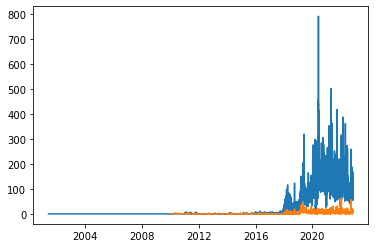

In [42]:
import matplotlib.pyplot as plt

plt.plot(graph['event_date'],graph['data_id'])
plt.plot(numerical_graph['event_date'], numerical_graph['data_id'])